In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.0 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**Applying** **Grayscale**

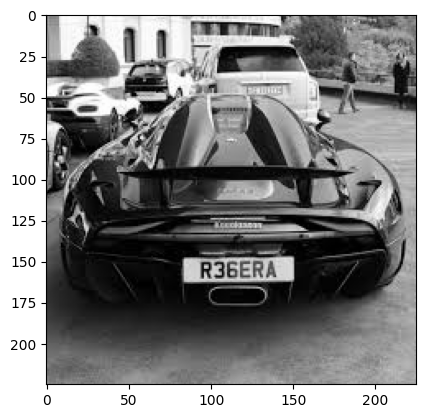

In [ ]:
img = cv2.imread('/content/image28.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #BGRtoGray
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))  #BGRtoRGB

**Apply filter and find edges for localization**

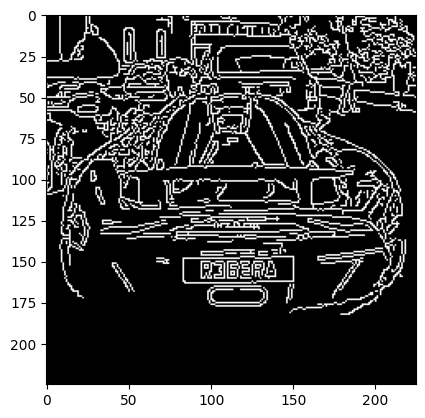

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
#11diameterofpixel #17valueofcolorspace #17valueofcoordinatespace
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))



 **Find Contours**

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #findingcontours
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #selectsfirst10fromsortedlist

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx #assignverticesofquadtloc
        break

In [ ]:
location

array([[[150, 147]],

       [[ 83, 148]],

       [[ 83, 162]],

       [[150, 162]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

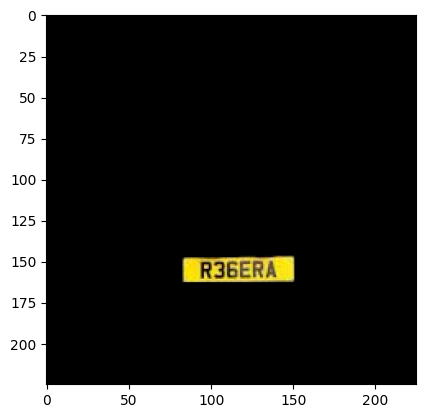

In [ ]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

**Finding non zero pixels in binary image**

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

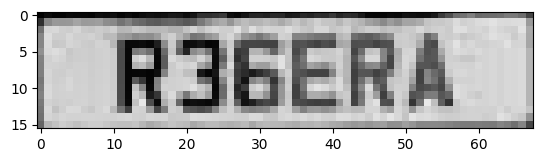

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

**Using EasyOCR to read text**

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[9, 1], [61, 1], [61, 16], [9, 16]], 'R36ERA', 0.9172000323047079)]

**Rendering the Result**

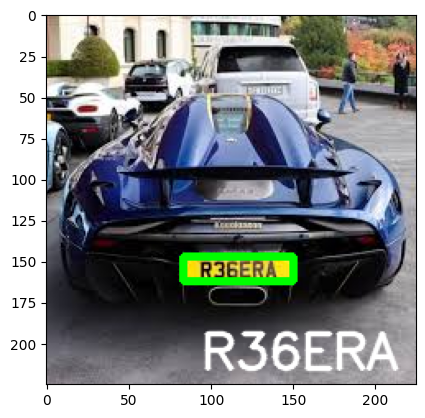

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
height, width, _ = img.shape
text_offset_x = width - 10 - cv2.getTextSize(text, font, 1, 2)[0][0]
text_offset_y = height - 10
res = cv2.putText(img, text=text, org=(text_offset_x, text_offset_y), fontFace=font, fontScale=1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))